In [17]:
import sys
sys.path.append('..')

import os

import torch
import matplotlib.pyplot as plt

In [18]:
log_dir = '/scratch/midway3/jshe/molecular-attention-bias/qm9/homo_lumo_U_H_G/'

## Biased Attention Transformer

In [19]:
from models.biased_attention_transformer import BiasedAttentionTransformer

202511051215491
202511032340391
202511051236332
202511040025533
202511051259323
202511051300374
202511040025532


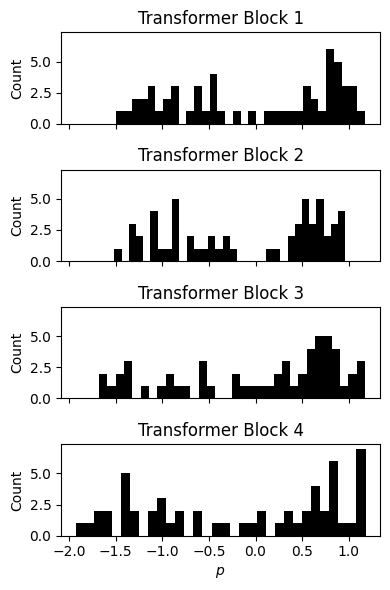

In [30]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'BiasedAttentionTransformer': continue
    if radial_function_type != 'PowerLaw4Zeros4': continue
    if architecture != 'E128H8D8': continue

    print(run_id)

    model = BiasedAttentionTransformer(
        n_tokens=6, 
        out_features=5, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        radial_function_type=["PowerLaw"] * 4 + ["Zeros"] * 4
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if not hasattr(transformer_block.radial_function, 'p'): continue
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.p.squeeze().detach())

fig, axs = plt.subplots(
    len(exponents_by_layer), 
    figsize=(4, 1.5 * len(exponents_by_layer)), 
    sharex=True, sharey=True
)

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs.flatten())):
    ax.hist(exponents, bins=32, color='k')
    ax.set_title(f'Transformer Block {i + 1}')

for ax in axs[:]: ax.set_ylabel('Count')

axs[-1].set_xlabel('$p$')
#fig.suptitle('Histograms of learned exponents $p$ by layer')
fig.tight_layout()

202511051130311
202511051130283
202511051130282
202510302115030
202511032340393
202511051214574
202511032255292
202511032255291


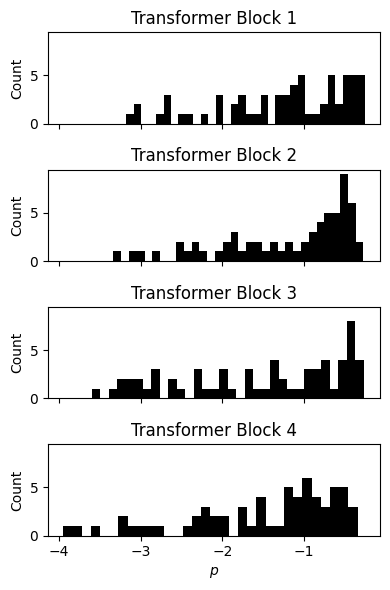

In [31]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'BiasedAttentionTransformer': continue
    if radial_function_type != 'ExpNegativePowerLaw4Zeros4': continue
    if architecture != 'E128H8D8': continue

    print(run_id)

    model = BiasedAttentionTransformer(
        n_tokens=6, 
        out_features=5, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        radial_function_type=["ExpNegativePowerLaw"] * 4 + ["Zeros"] * 4
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if not hasattr(transformer_block.radial_function, 'log_p'): continue
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(-transformer_block.radial_function.log_p.exp().squeeze().detach())

fig, axs = plt.subplots(
    len(exponents_by_layer), 
    figsize=(4, 1.5 * len(exponents_by_layer)), 
    sharex=True, sharey=True
)

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs.flatten())):
    ax.hist(exponents, bins=32, color='k')
    ax.set_title(f'Transformer Block {i + 1}')

for ax in axs[:]: ax.set_ylabel('Count')

axs[-1].set_xlabel('$p$')
#fig.suptitle('Histograms of learned exponents $p$ by layer')
fig.tight_layout()

## Fixed Attention Transformer

In [22]:
from models.fixed_attention_transformer import FixedAttentionTransformer

202511051433592
202511051423151
202511040330342
202511051459443
202511040321461
202511040335483
202511051501214


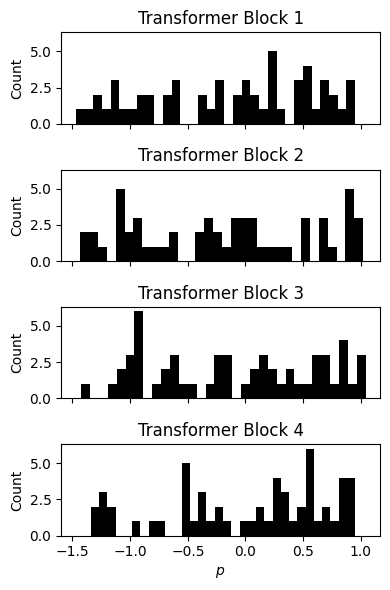

In [28]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'FixedAttentionTransformer': continue
    if radial_function_type != 'PowerLaw4Zeros4': continue
    if architecture != 'E128H8D8': continue

    print(run_id)

    model = FixedAttentionTransformer(
        n_tokens=6, 
        out_features=5, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        radial_function_type=["PowerLaw"] * 4 + ["Zeros"] * 4
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if not hasattr(transformer_block.radial_function, 'p'): continue
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(transformer_block.radial_function.p.squeeze().detach())

fig, axs = plt.subplots(
    len(exponents_by_layer), 
    figsize=(4, 1.5 * len(exponents_by_layer)), 
    sharex=True, sharey=True
)

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs.flatten())):
    ax.hist(exponents, bins=32, color='k')
    ax.set_title(f'Transformer Block {i + 1}')

for ax in axs[:]: ax.set_ylabel('Count')

axs[-1].set_xlabel('$p$')
#fig.suptitle('Histograms of learned exponents $p$ by layer')
fig.tight_layout()

202511040237181
202511040305133
202511040242312
202511051344513
202511051343242
202511051421074
202511051341031


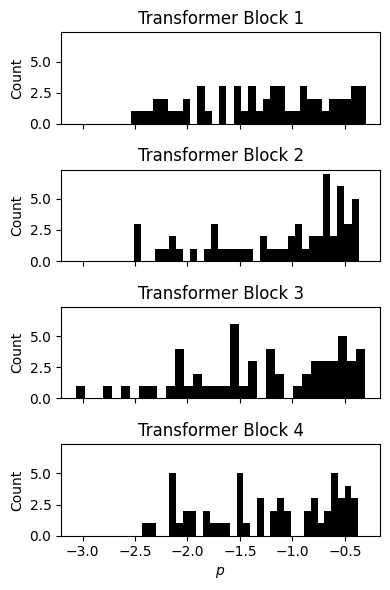

In [33]:
exponents_by_layer = []

for root, dirs, files in os.walk(log_dir):
    if not files or 'model.pt' not in files: continue
    *_, model_type, radial_function_type, architecture, run_id = root.split('/')
    if model_type != 'FixedAttentionTransformer': continue
    if radial_function_type != 'ExpNegativePowerLaw4Zeros4': continue
    if architecture != 'E128H8D8': continue

    print(run_id)

    model = FixedAttentionTransformer(
        n_tokens=6, 
        out_features=5, 
        E=128, H=8, D=8, 
        dropout=0.1, 
        radial_function_type=["ExpNegativePowerLaw"] * 4 + ["Zeros"] * 4
    )

    model_file = os.path.join(root, 'model.pt')
    state_dict = torch.load(model_file, map_location=torch.device('cpu'))
    model.load_state_dict(state_dict)

    for i, transformer_block in enumerate(model.transformer_blocks):
        if not hasattr(transformer_block.radial_function, 'log_p'): continue
        if i == len(exponents_by_layer): exponents_by_layer.append([])
        exponents_by_layer[i] += list(-transformer_block.radial_function.log_p.exp().squeeze().detach())

fig, axs = plt.subplots(
    len(exponents_by_layer), 
    figsize=(4, 1.5 * len(exponents_by_layer)), 
    sharex=True, sharey=True
)

for i, (exponents, ax)  in enumerate(zip(exponents_by_layer, axs.flatten())):
    ax.hist(exponents, bins=32, color='k')
    ax.set_title(f'Transformer Block {i + 1}')

for ax in axs[:]: ax.set_ylabel('Count')

axs[-1].set_xlabel('$p$')
#fig.suptitle('Histograms of learned exponents $p$ by layer')
fig.tight_layout()